# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

# set up of example
sim_no = 1
n_train = 1000
snr = 10
groundtruth_effect = "empirical"

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generating.data_generation import generate_data

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.104287,0.235210,6.137902e-04,2.086436e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.218315,0.734647,9.344475e-04,1.181749e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.001490,0.000908,2.419734e-04,3.119581e-05
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.001847,0.001178,1.049196e-08,1.049196e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.001681,0.003712,8.347909e-04,1.694288e-03
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2add-cor_20_1000_5,XGBoost-2add-cor,20,1000,5.0,mean_squared_error,0.035555,0.130371,3.275912e-03,1.546729e-03
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.078370,0.593145,3.563493e-03,8.239209e-04
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.003076,0.025708,2.439979e-03,1.993888e-04
198,0,GAM-2add-cor_20_1000_5,GAM-2add-cor,20,1000,5.0,mean_squared_error,0.002949,0.002280,1.355322e-04,1.355322e-04


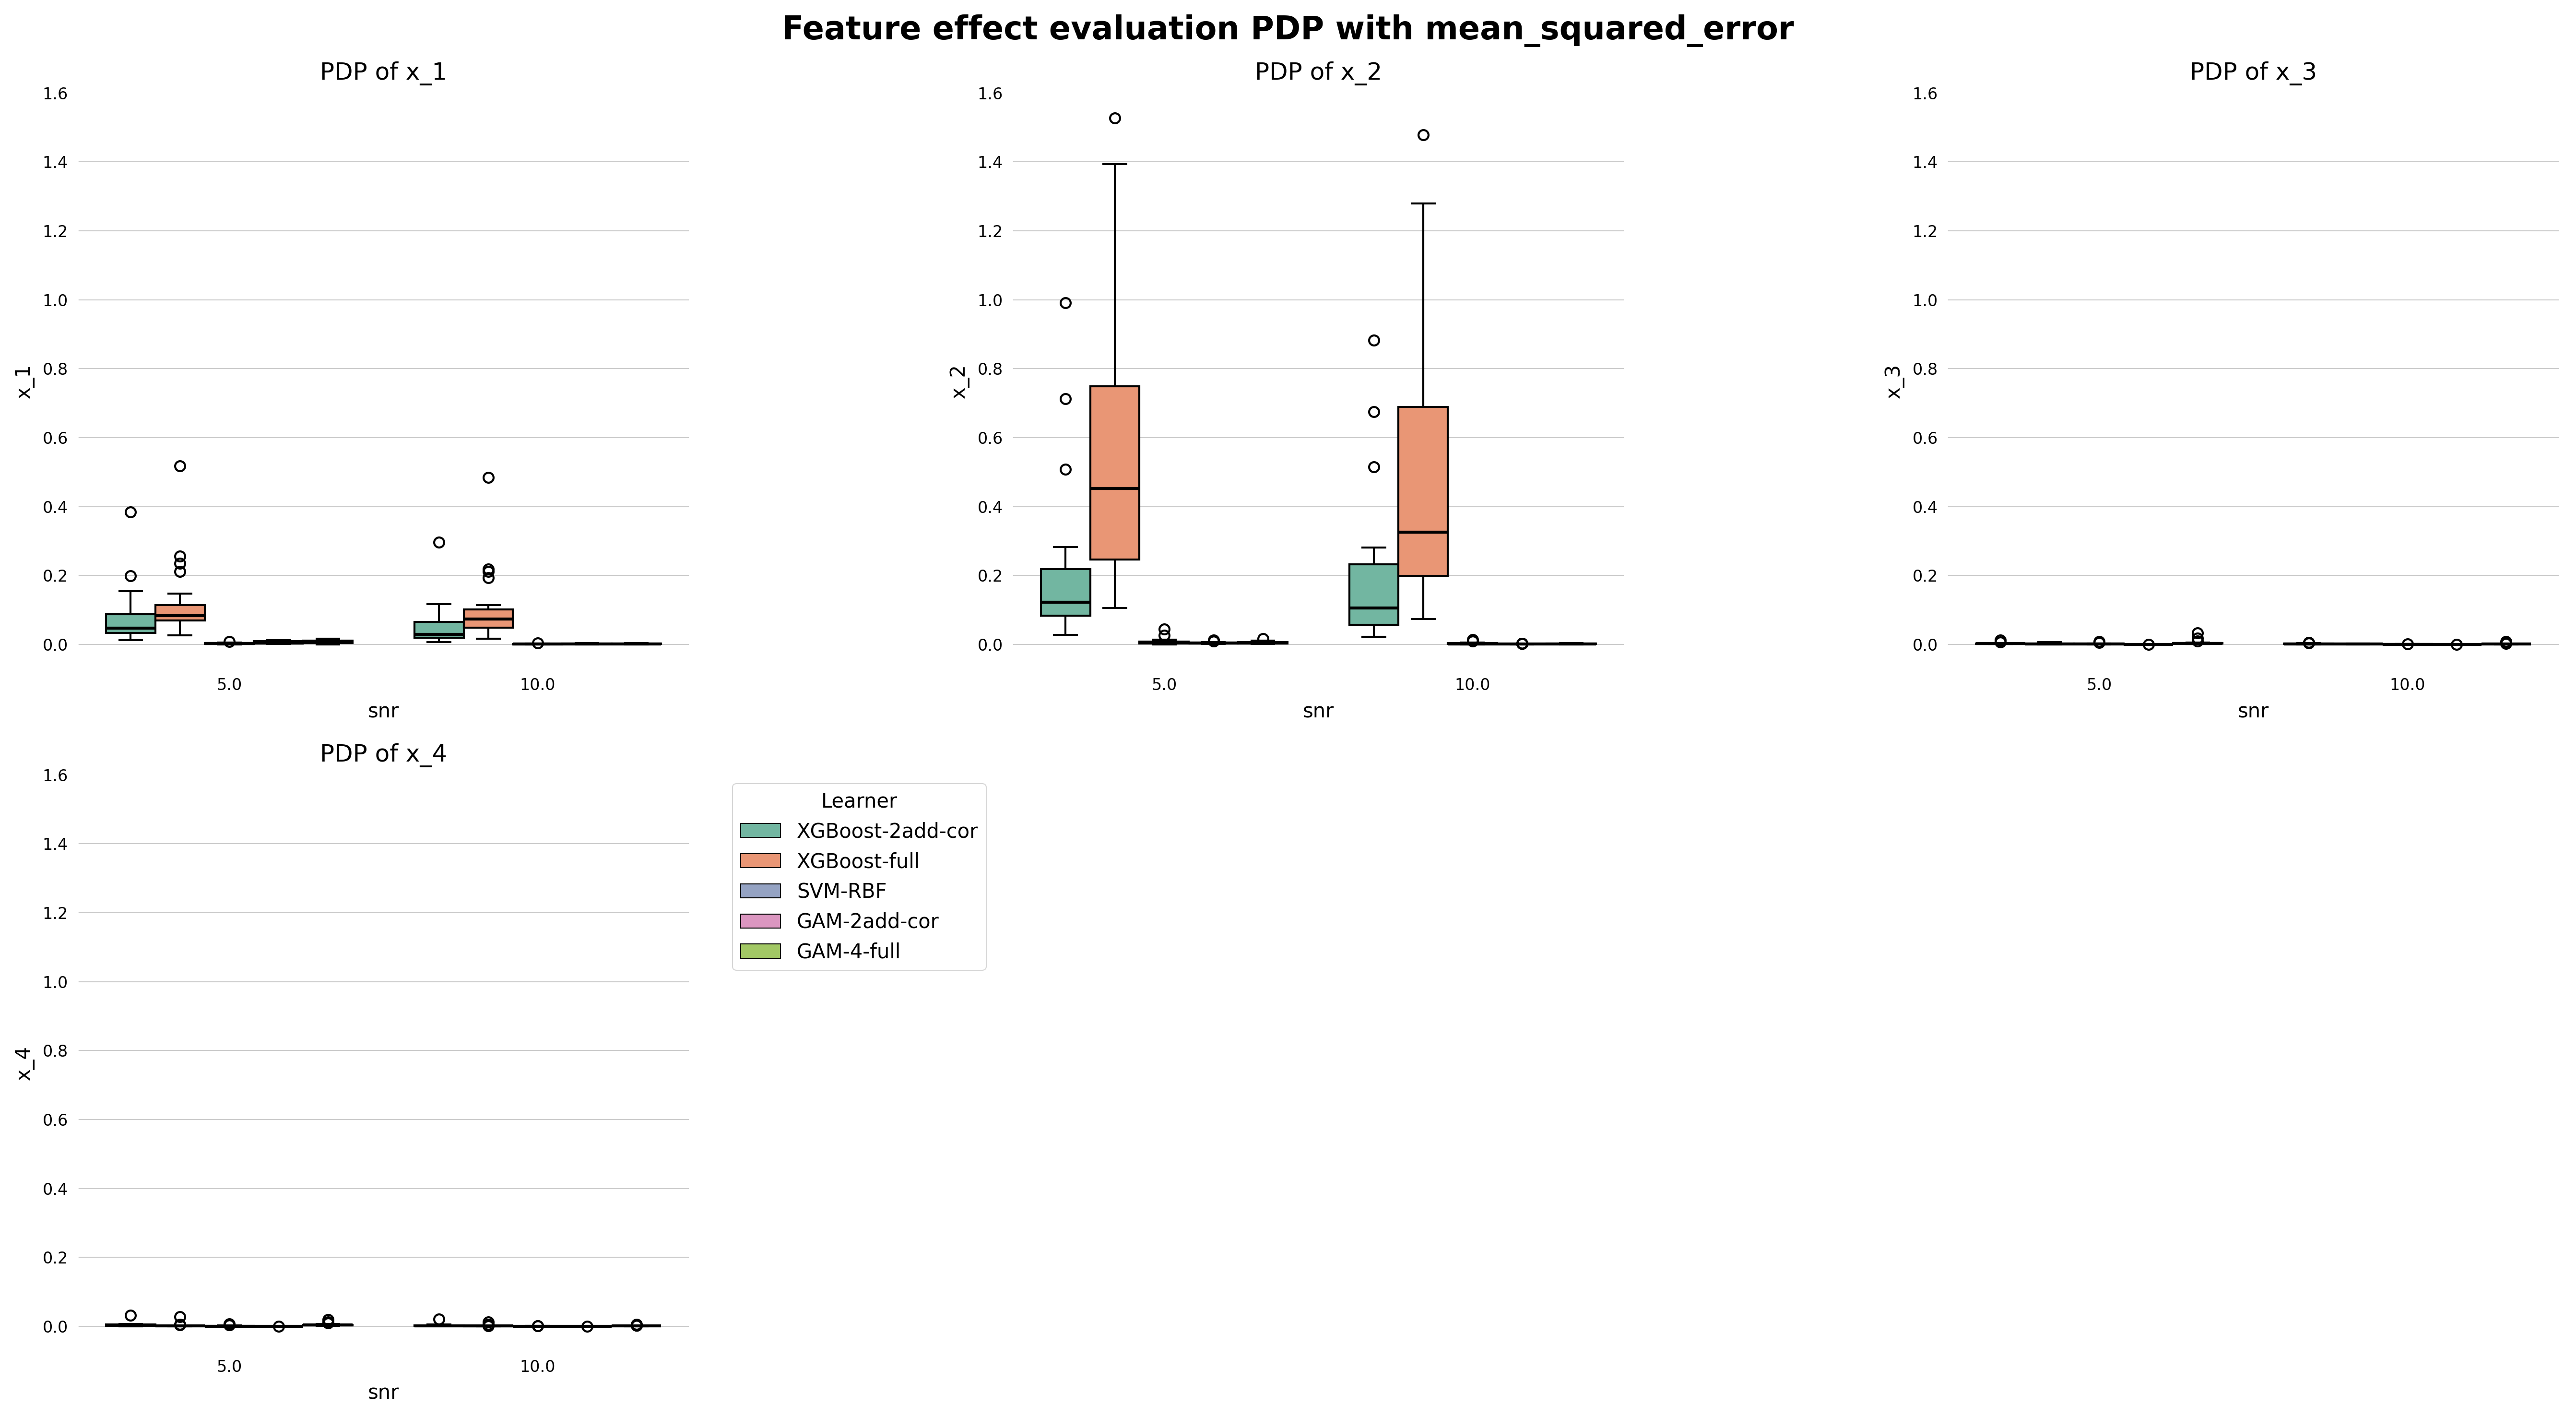

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="PDP");

### PDP example visualizations

In [6]:
md(f"(simulation no. {sim_no} with n_train={n_train} and snr={snr})")

(simulation no. 1 with n_train=1000 and snr=10)

In [13]:
# init groundtruth
groundtruth = load("../groundtruth.joblib")
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(groundtruth, n_train, 1000, snr, seed=1)
# load models
gam_cor = load(f'../models/GAM-2add-cor_{sim_no}_{n_train}_{snr}.joblib')
gam_full = load(f'../models/GAM-4-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_full = load(f'../models/XGBoost-full_{sim_no}_{n_train}_{snr}.joblib')
xgb_cor = load(f'../models/XGBoost-2add-cor_{sim_no}_{n_train}_{snr}.joblib')
svm = load(f'../models/SVM-RBF_{sim_no}_{n_train}_{snr}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


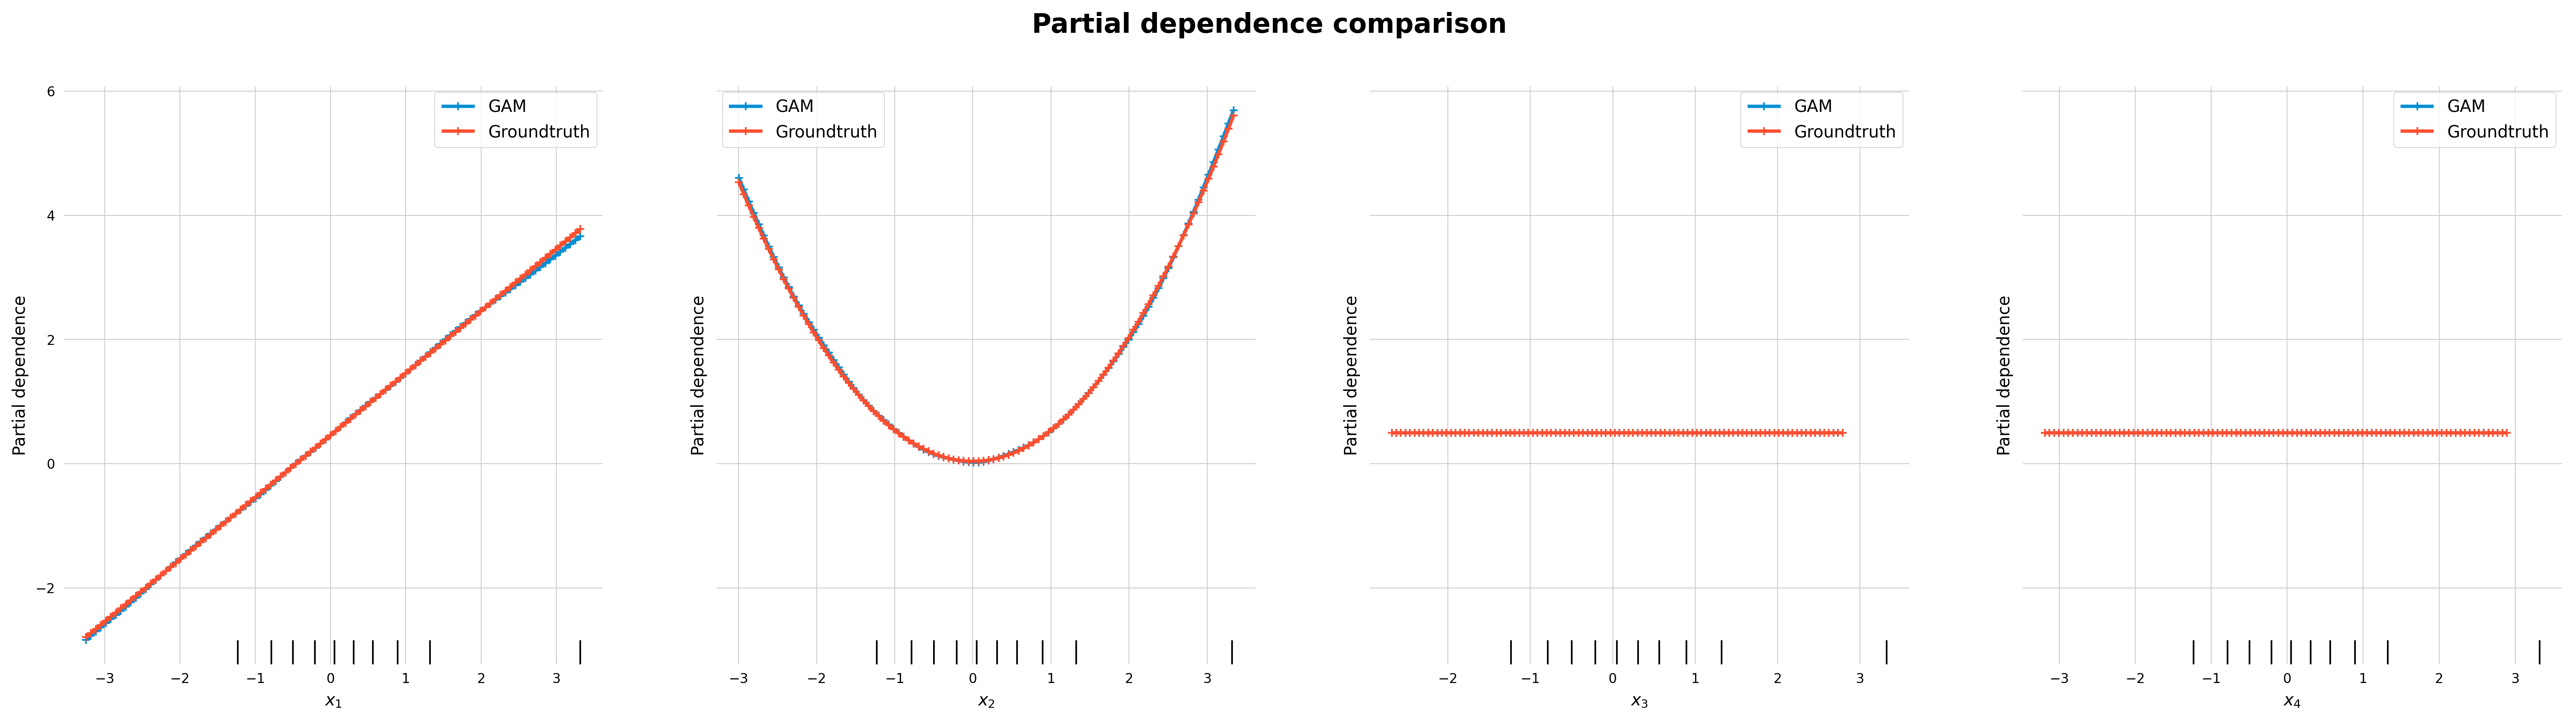

In [14]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

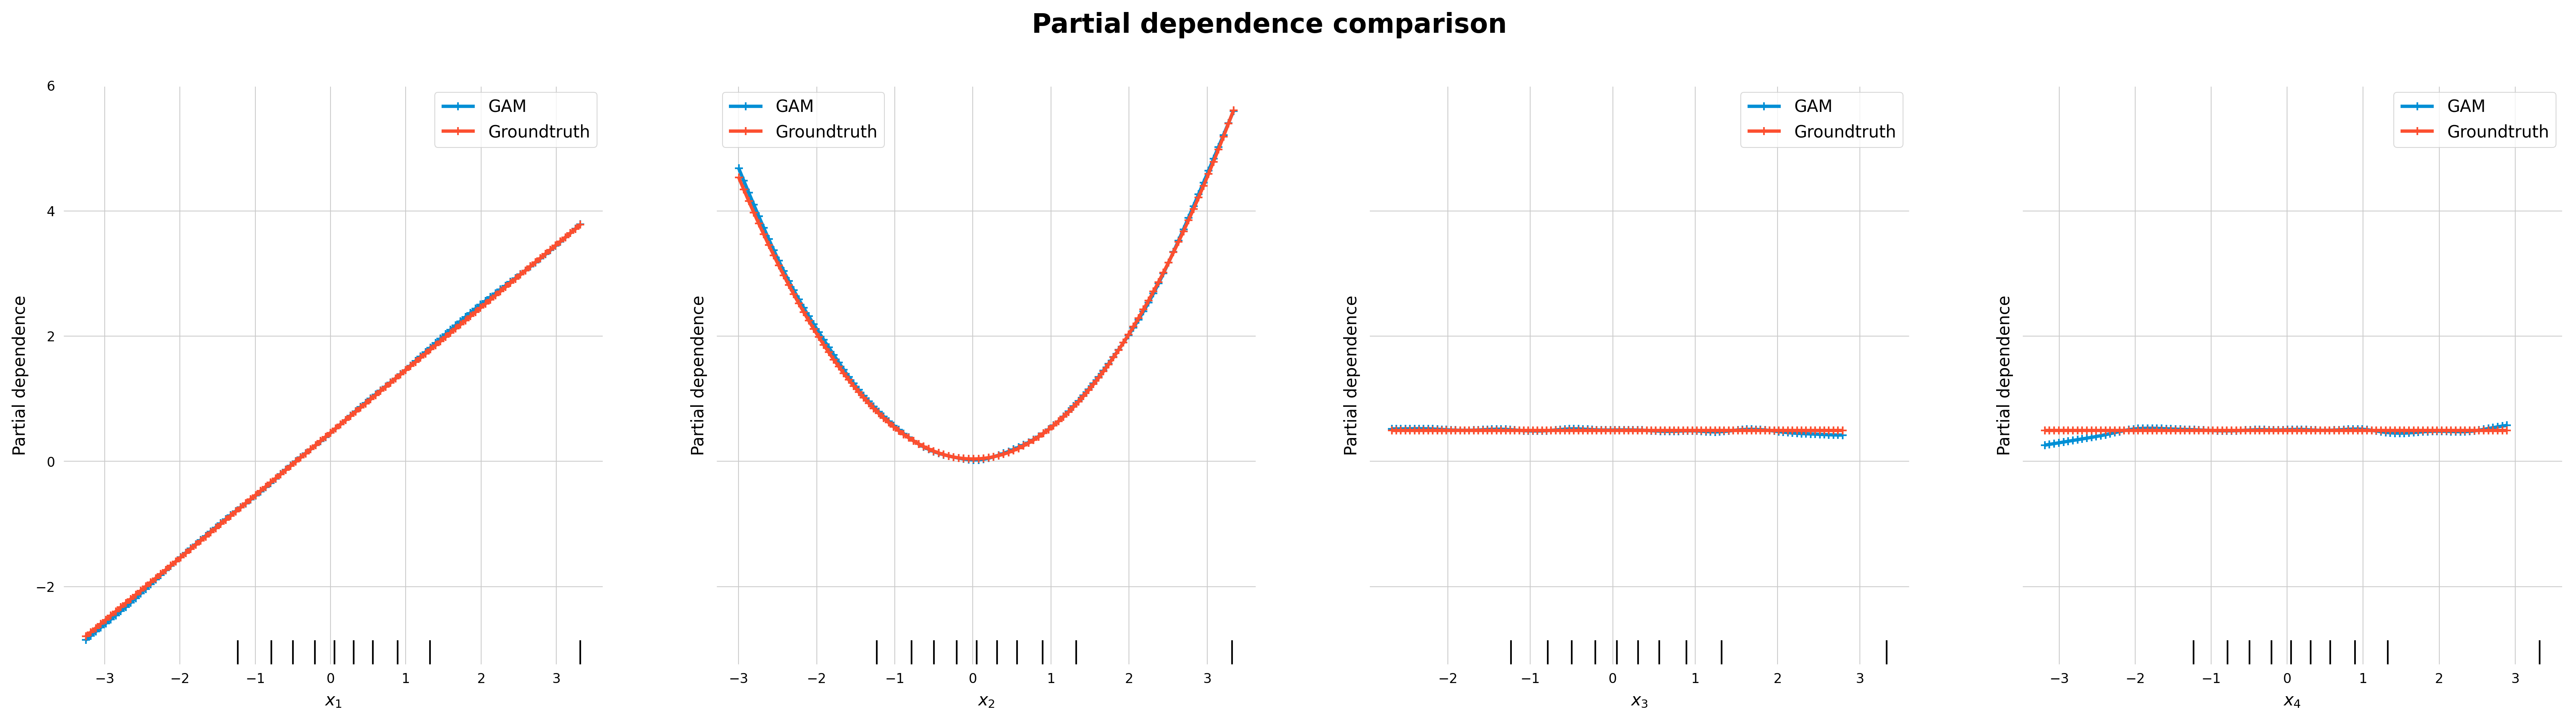

In [15]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

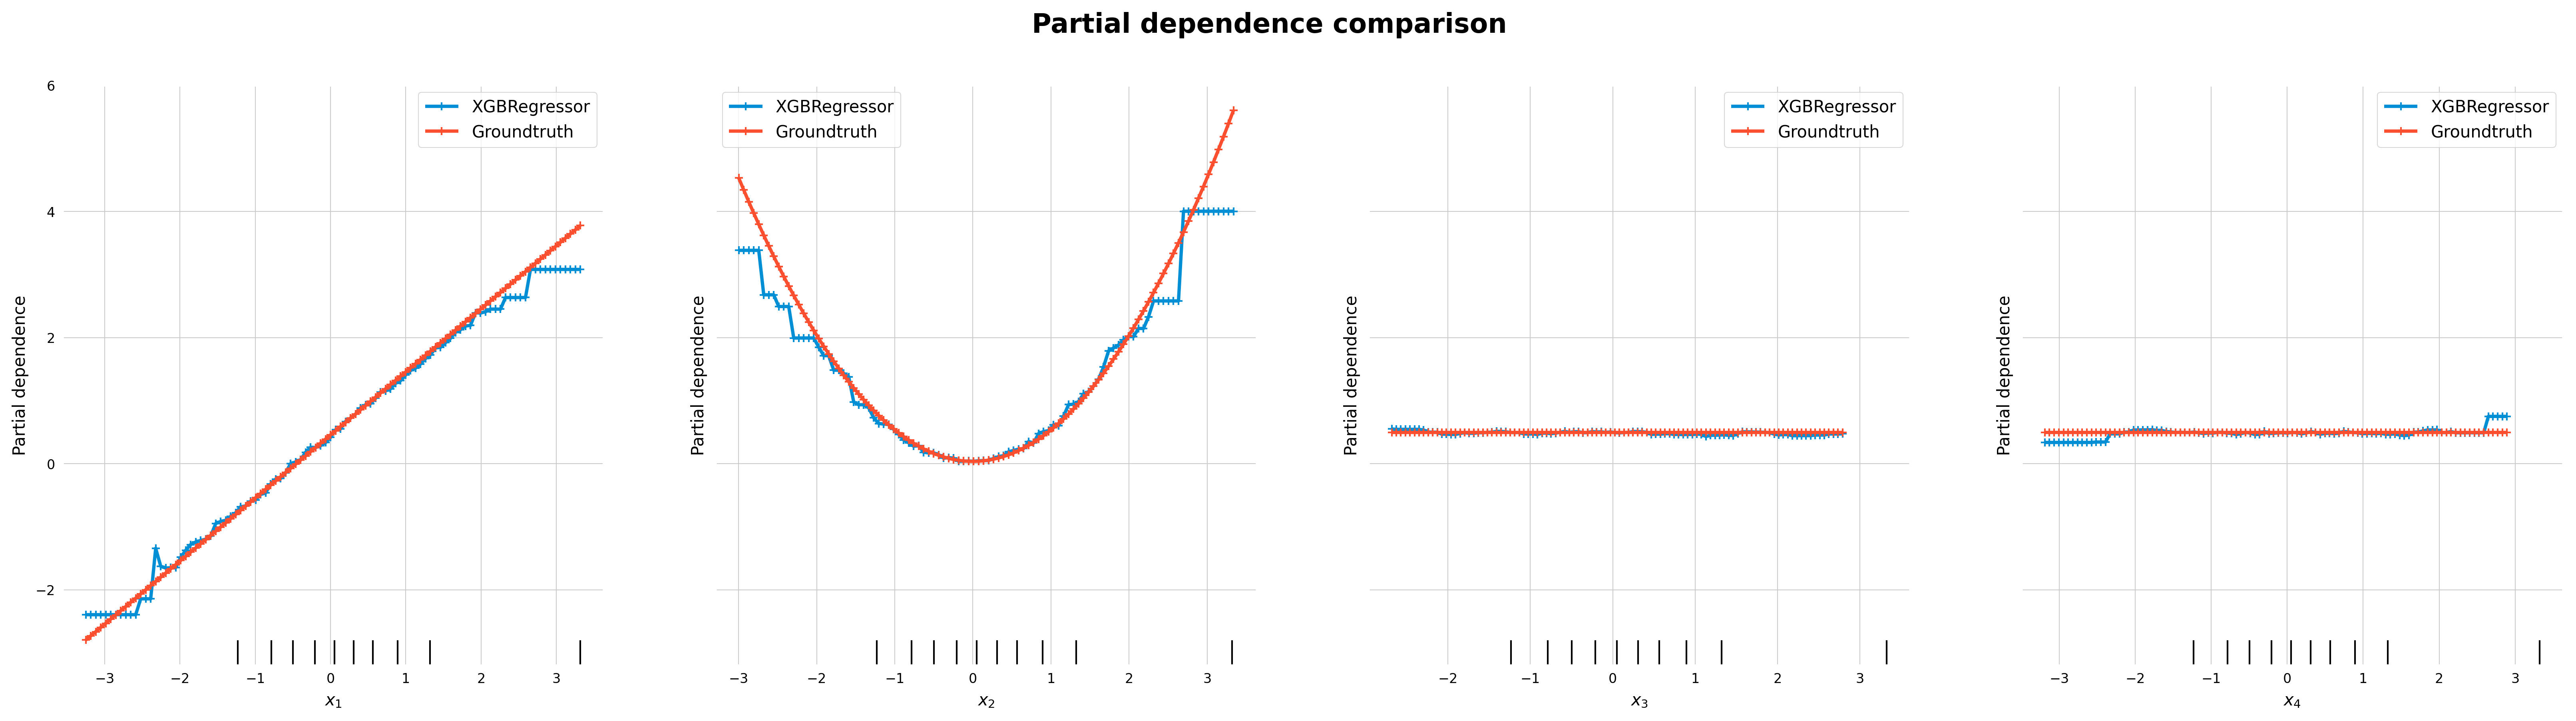

In [16]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

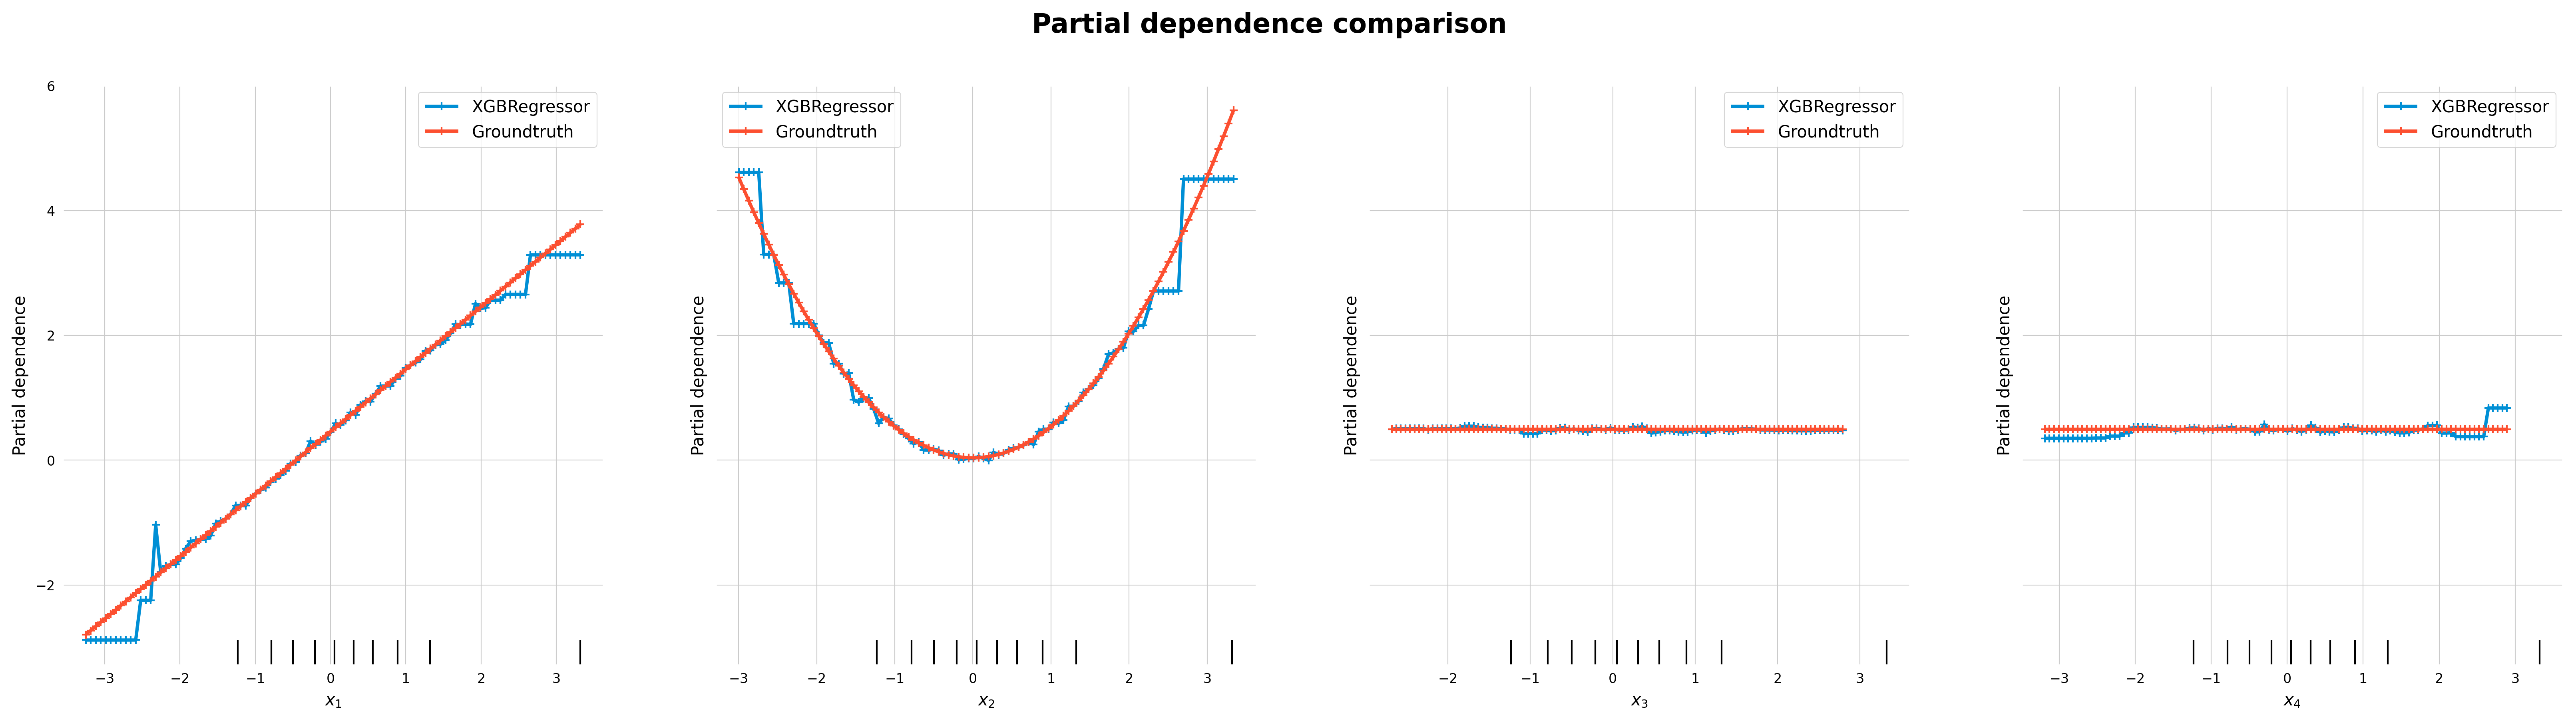

In [17]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

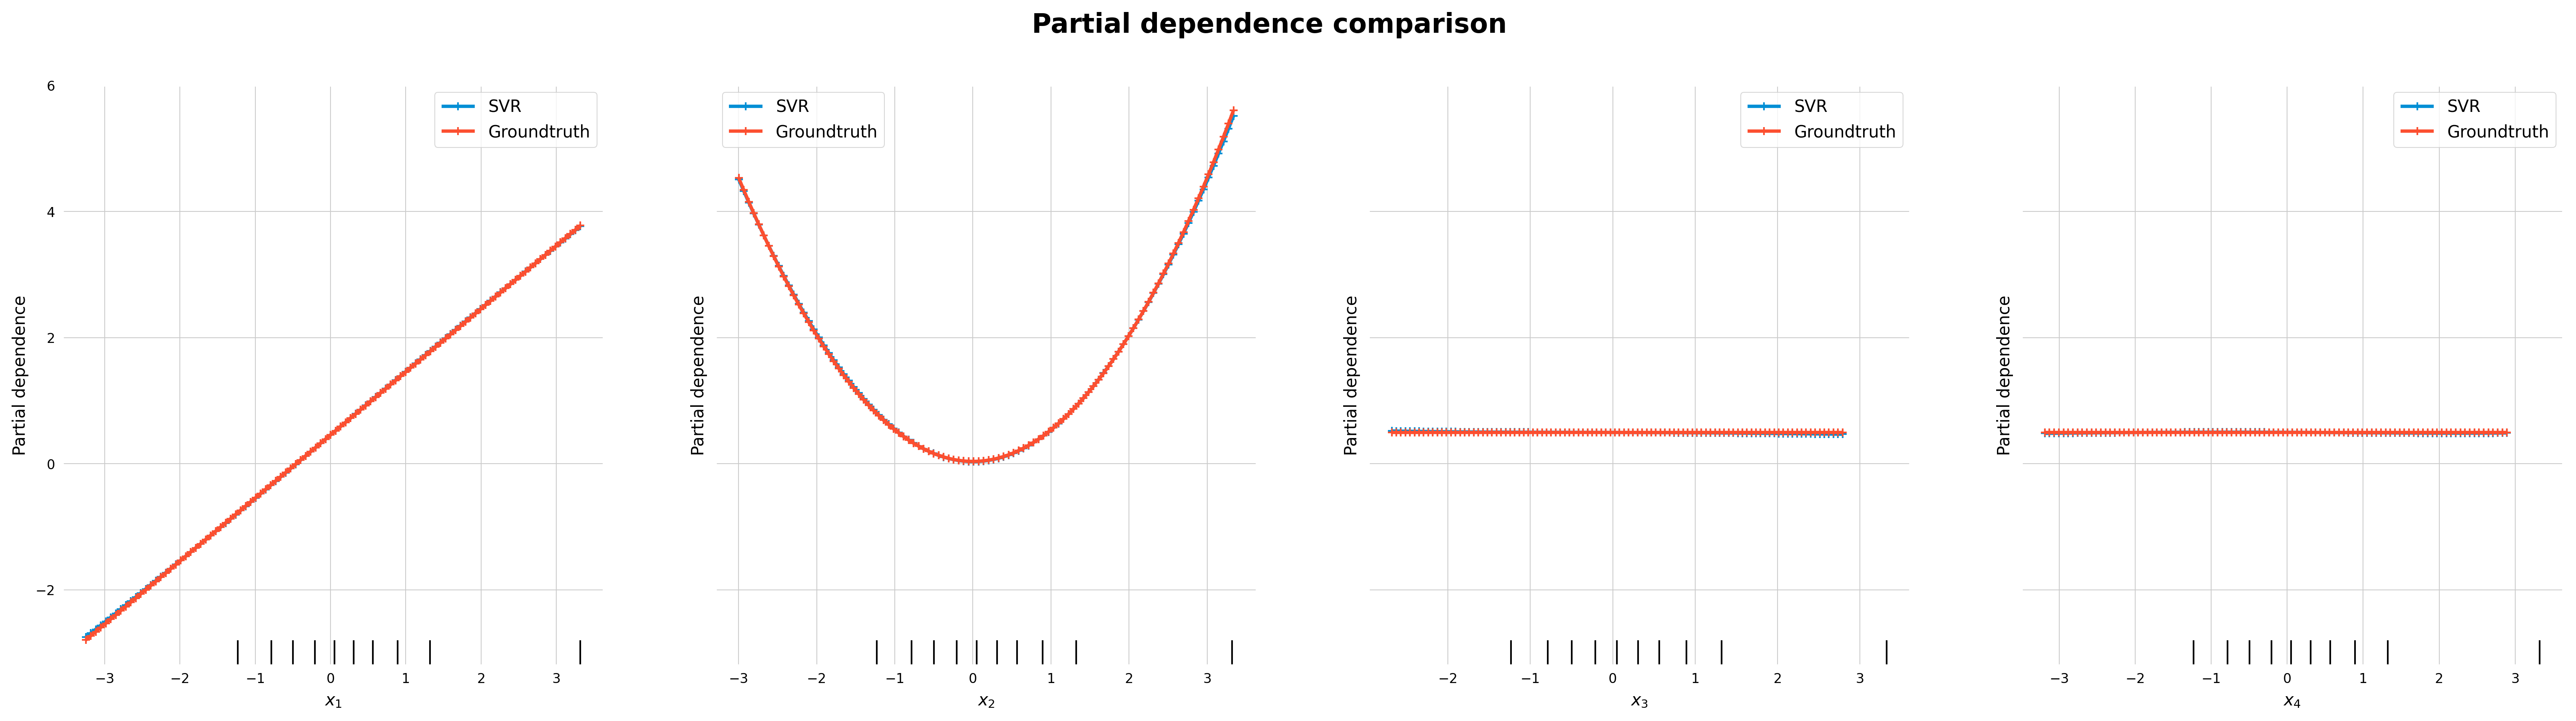

In [18]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [19]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.024720,0.057869,0.001533,0.002572
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.023843,0.078302,0.000929,0.001774
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000175,0.000304,0.000053,0.000025
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.000235,0.000230,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000124,0.000191,0.000239,0.000415
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2add-cor_20_1000_5,XGBoost-2add-cor,20,1000,5.0,mean_squared_error,0.011052,0.040325,0.001664,0.000656
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.012884,0.081644,0.001977,0.000596
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.000643,0.002084,0.000670,0.000047
198,0,GAM-2add-cor_20_1000_5,GAM-2add-cor,20,1000,5.0,mean_squared_error,0.000413,0.000805,0.000000,0.000000


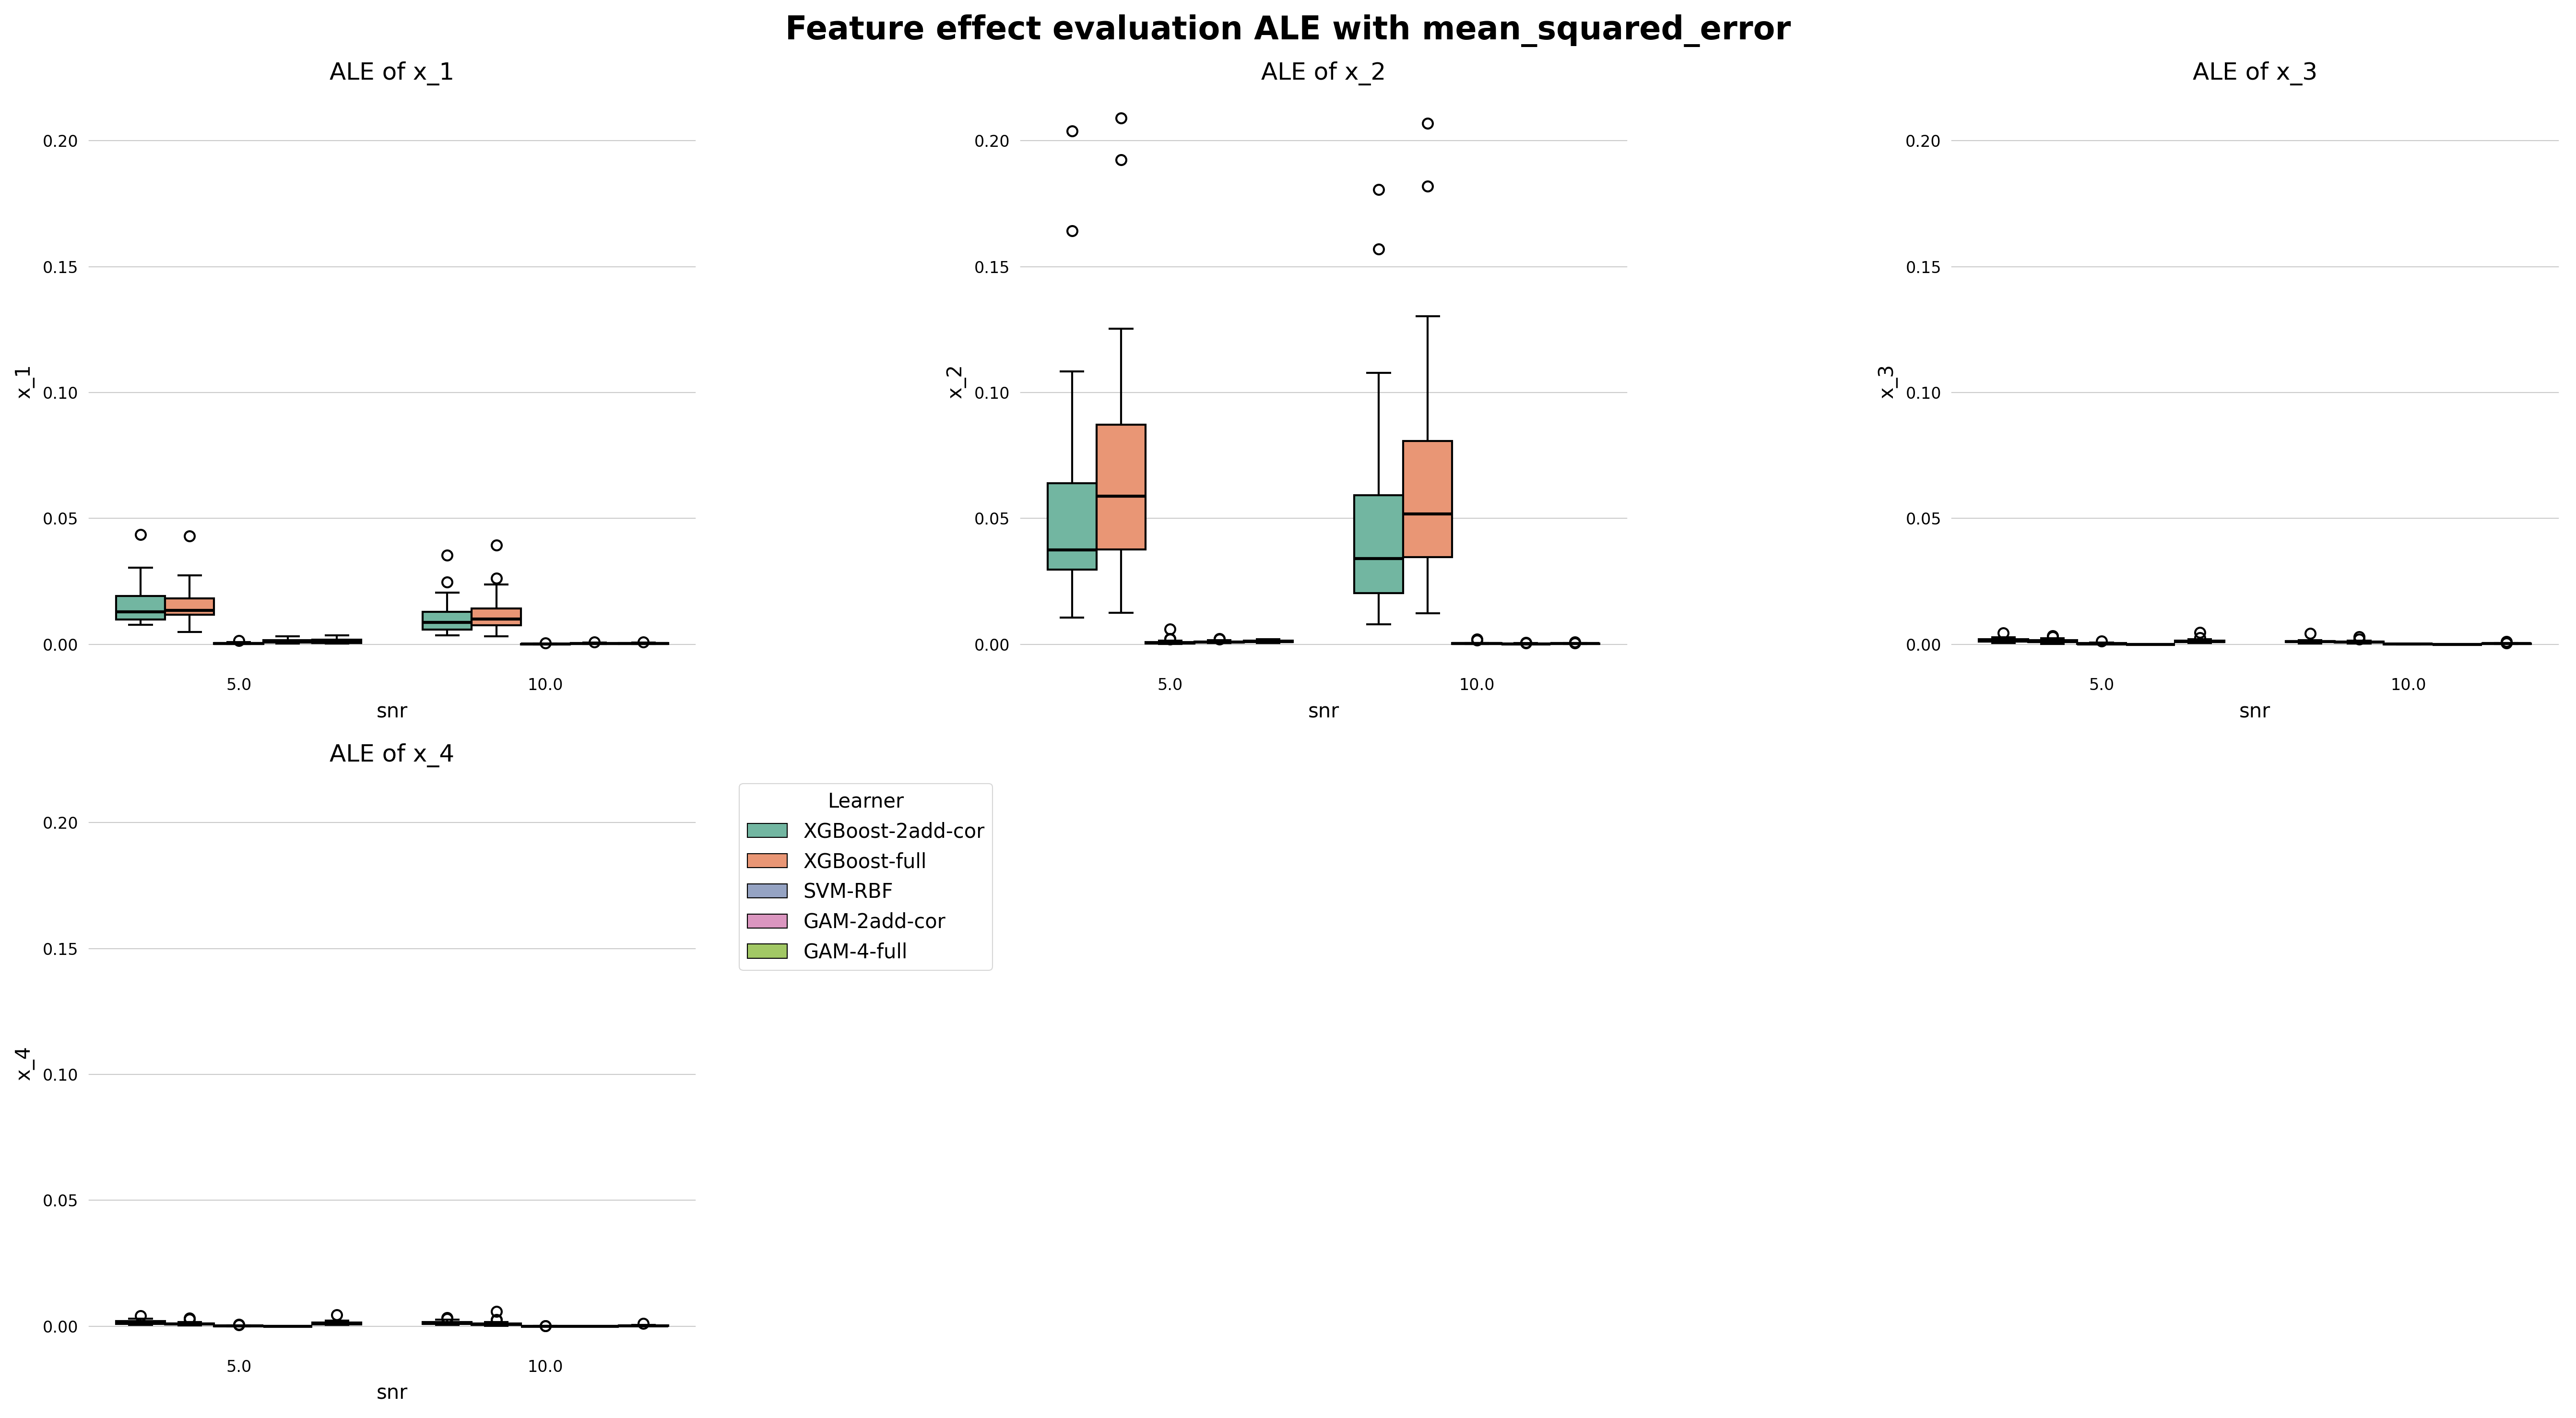

In [20]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="ALE");

### ALE example visualizations

In [21]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={snr})")

(simulation no. 1 with n_train=1000 and noise_sd=10)

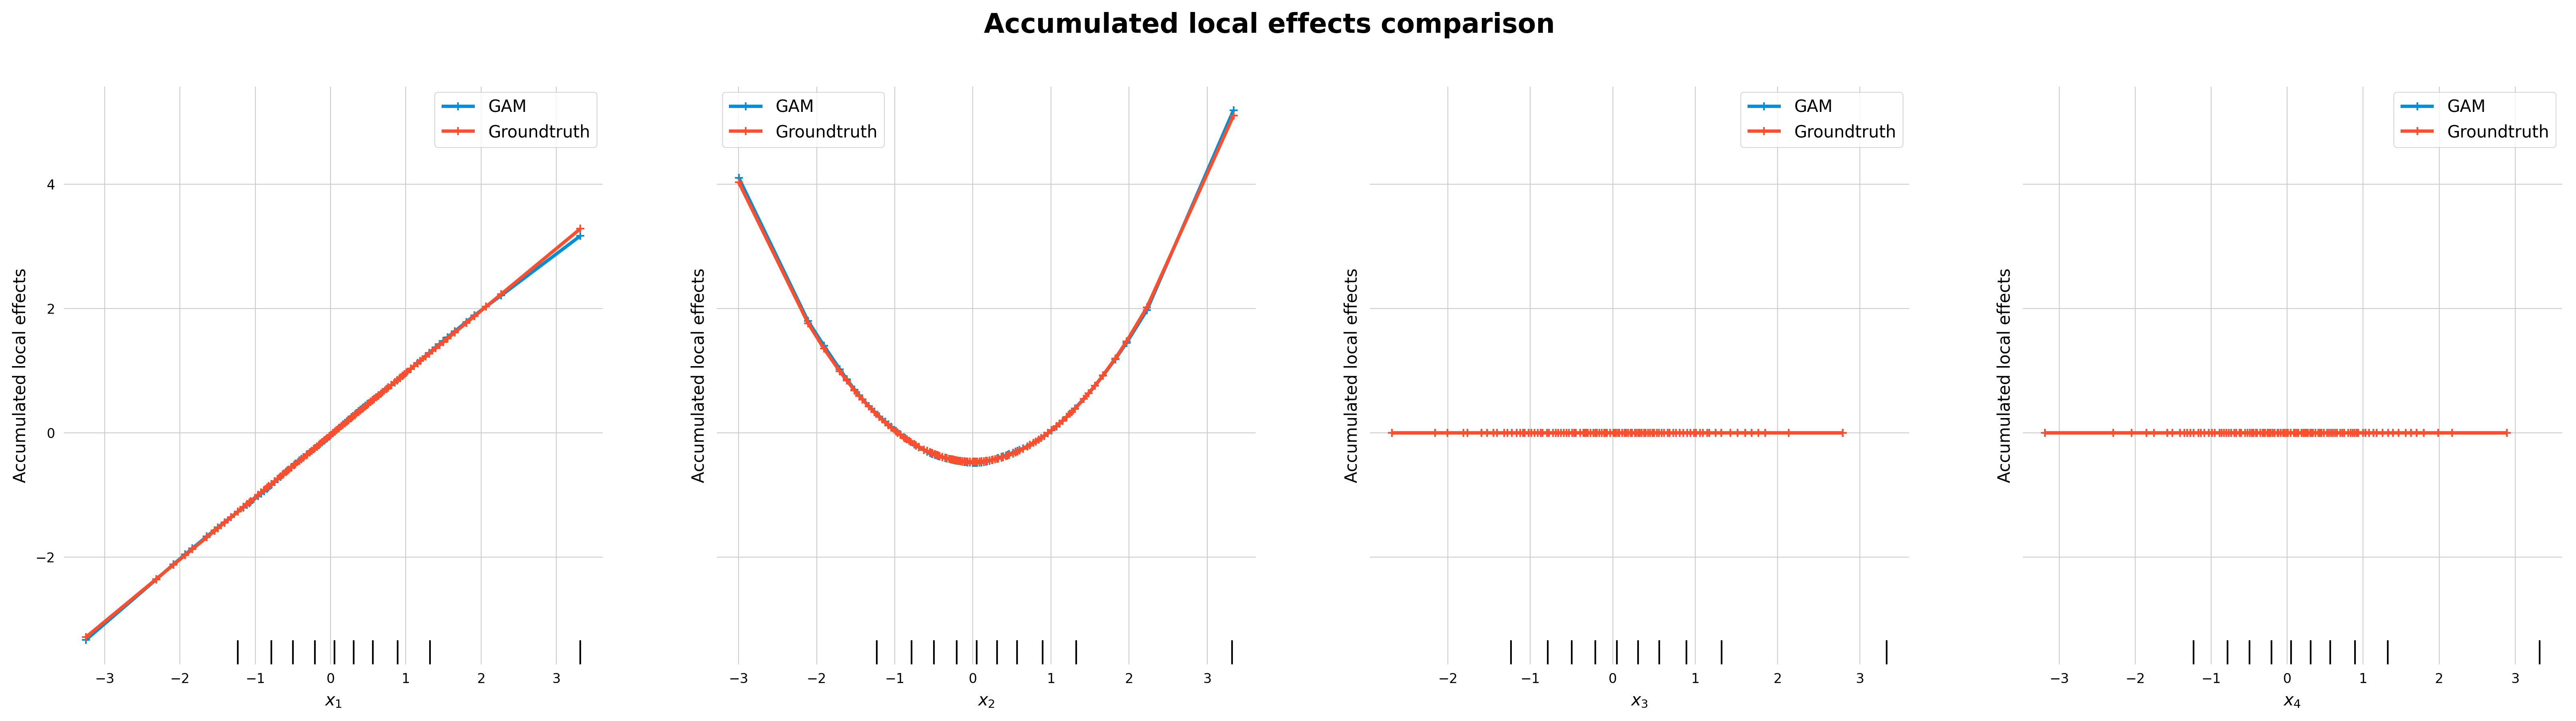

In [22]:
%matplotlib inline
plot_effect_comparison(gam_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

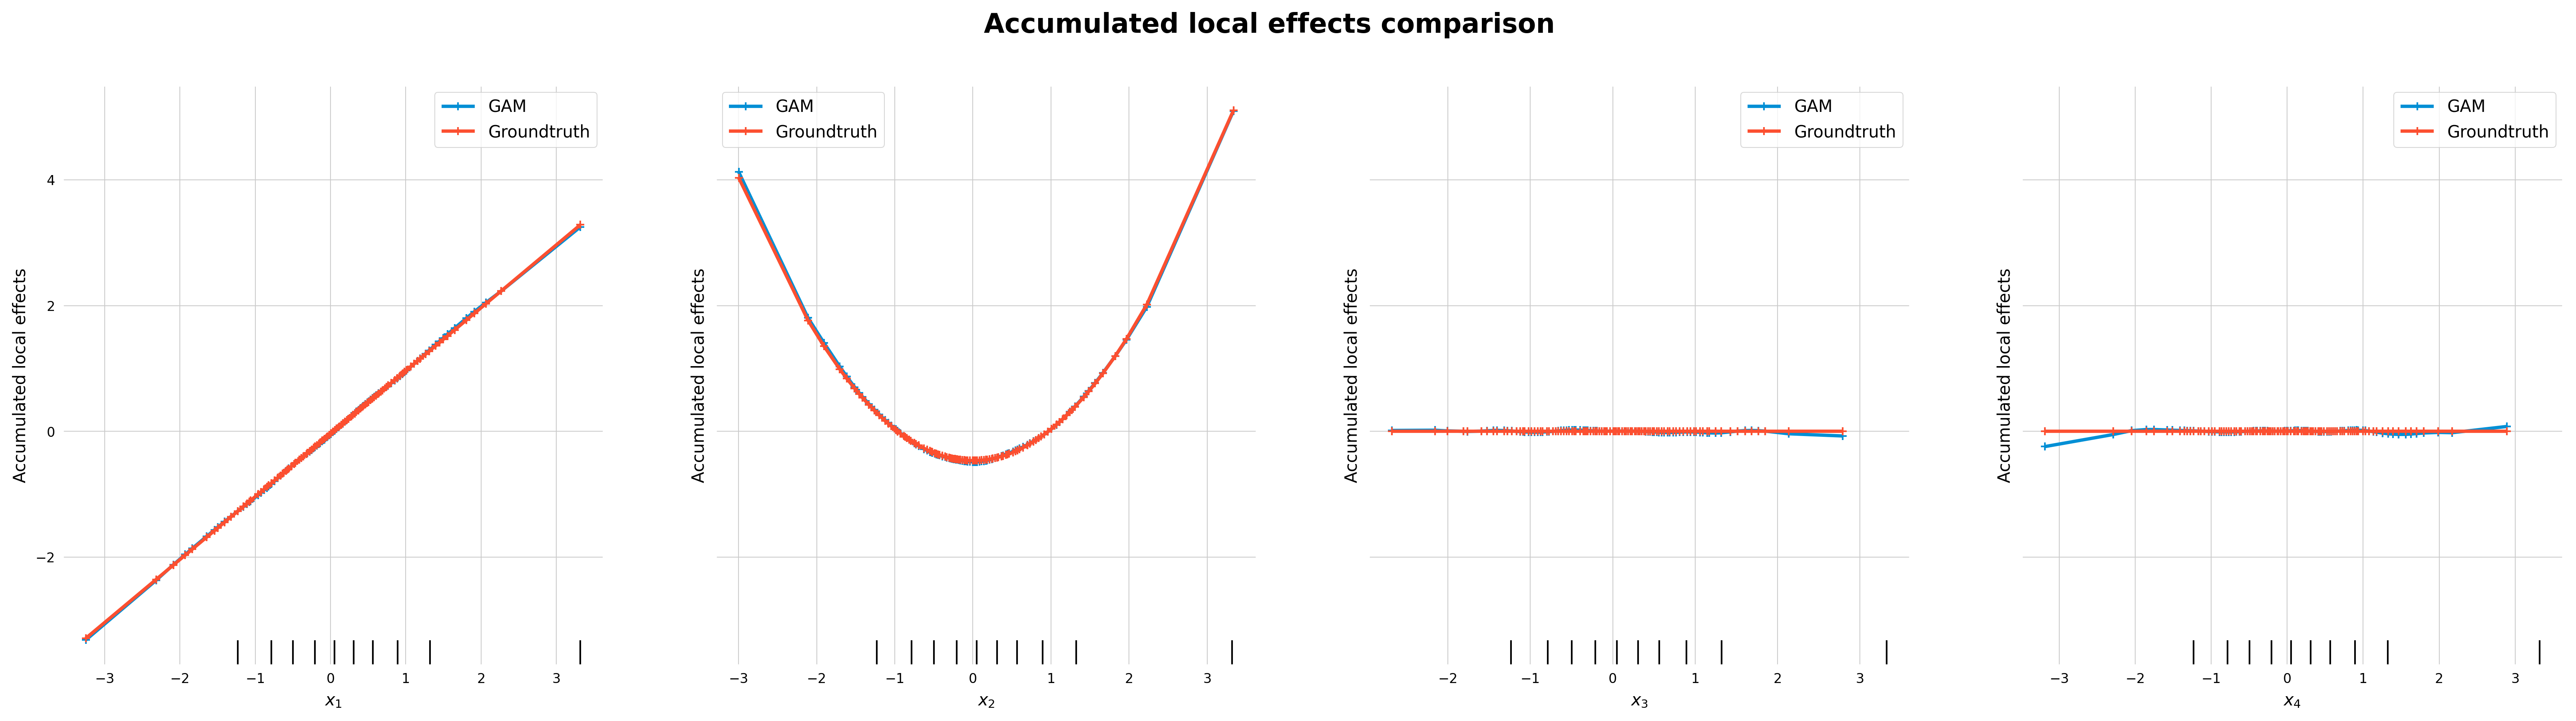

In [23]:
%matplotlib inline
plot_effect_comparison(gam_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

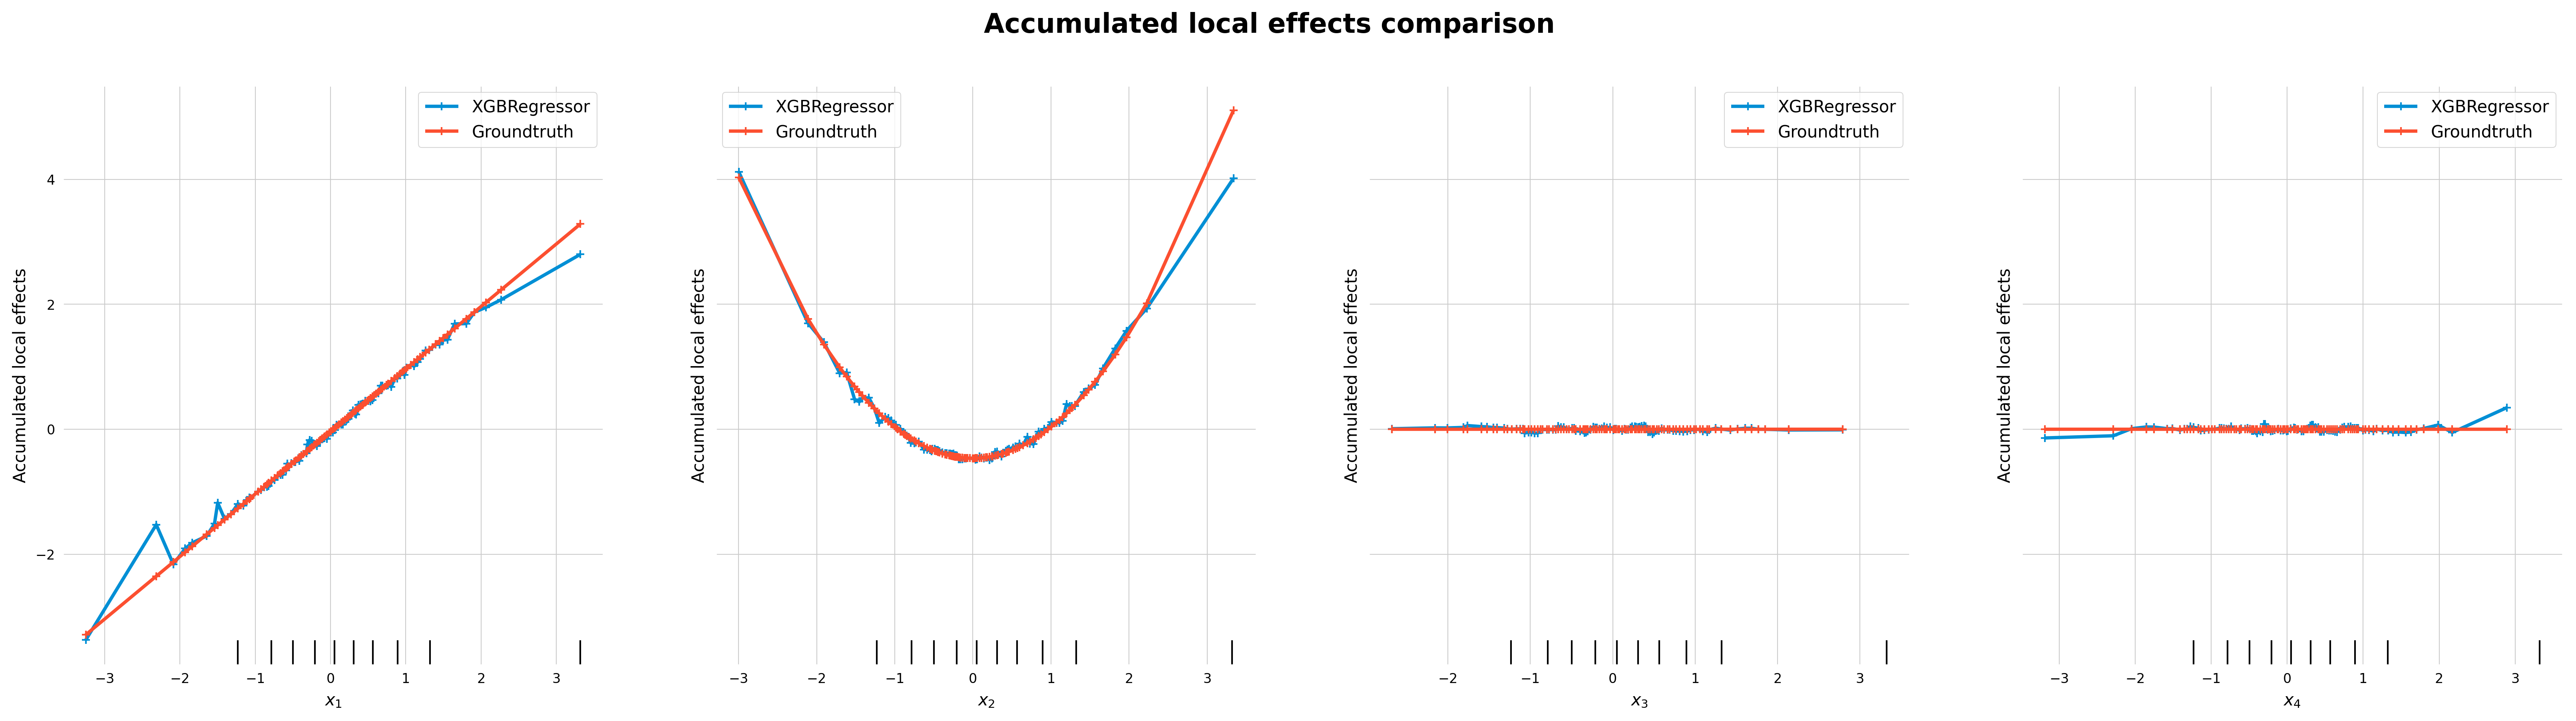

In [24]:
%matplotlib inline
plot_effect_comparison(xgb_cor, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

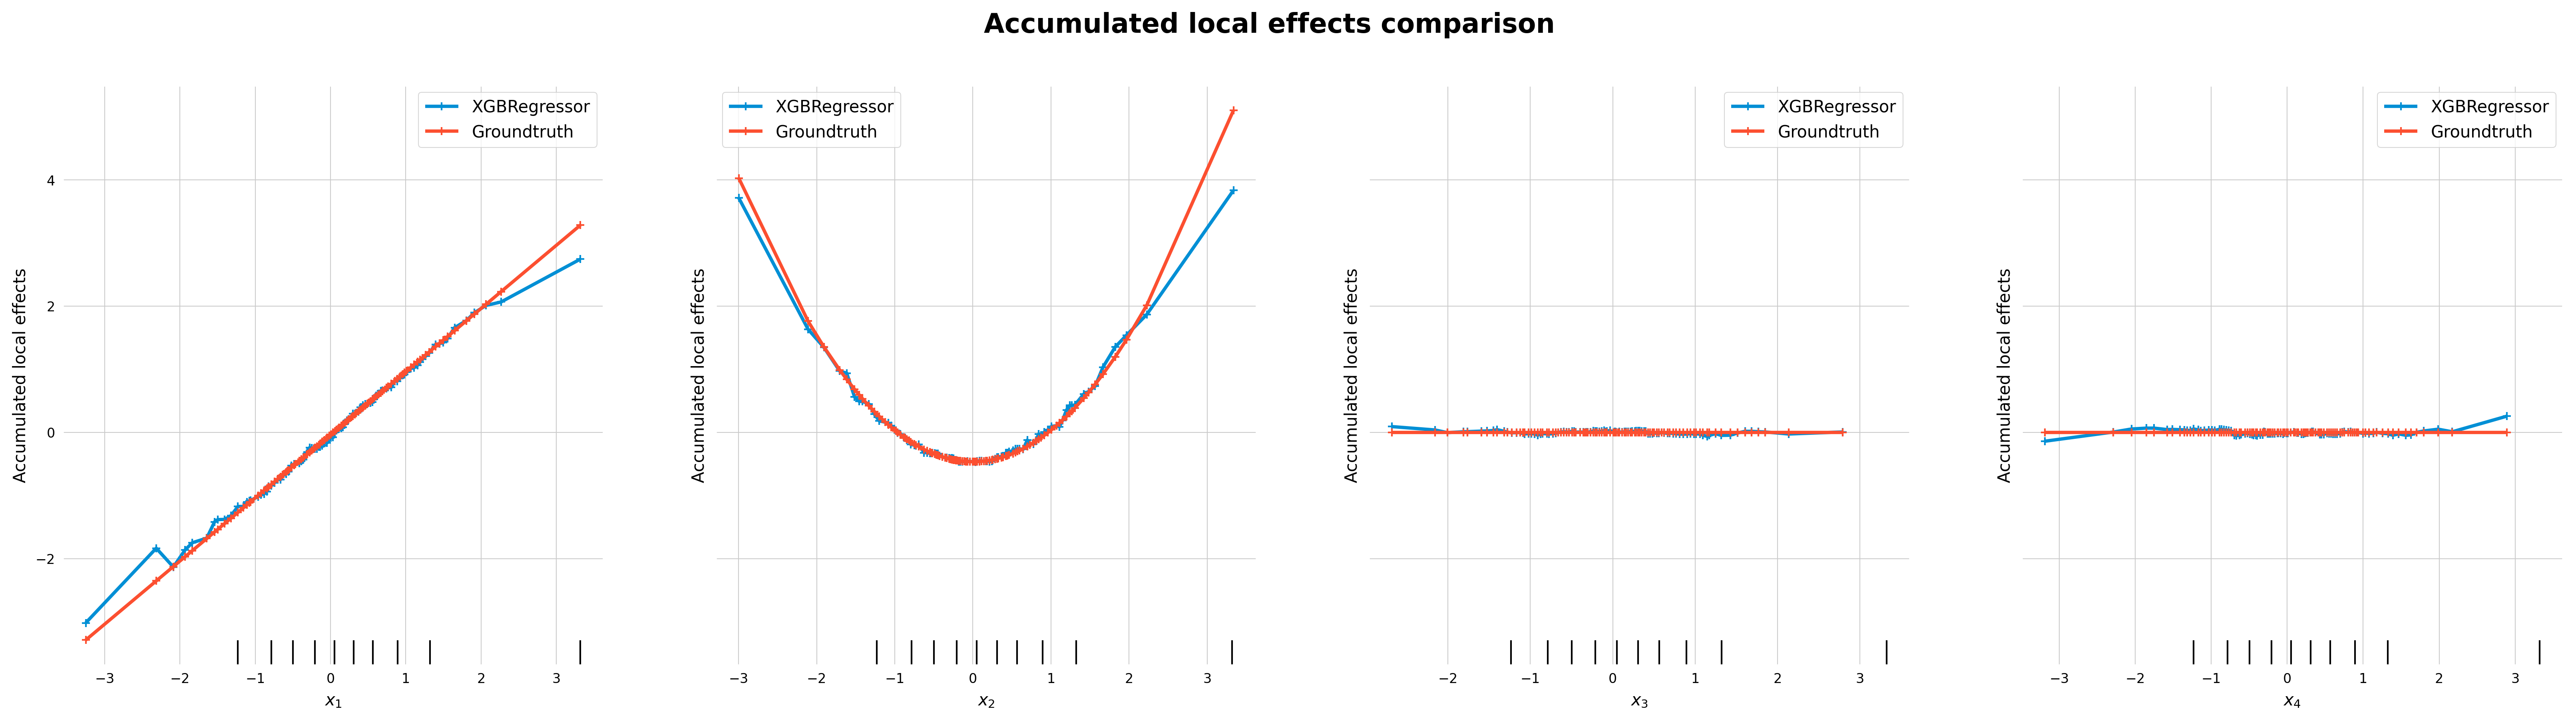

In [25]:
%matplotlib inline
plot_effect_comparison(xgb_full, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

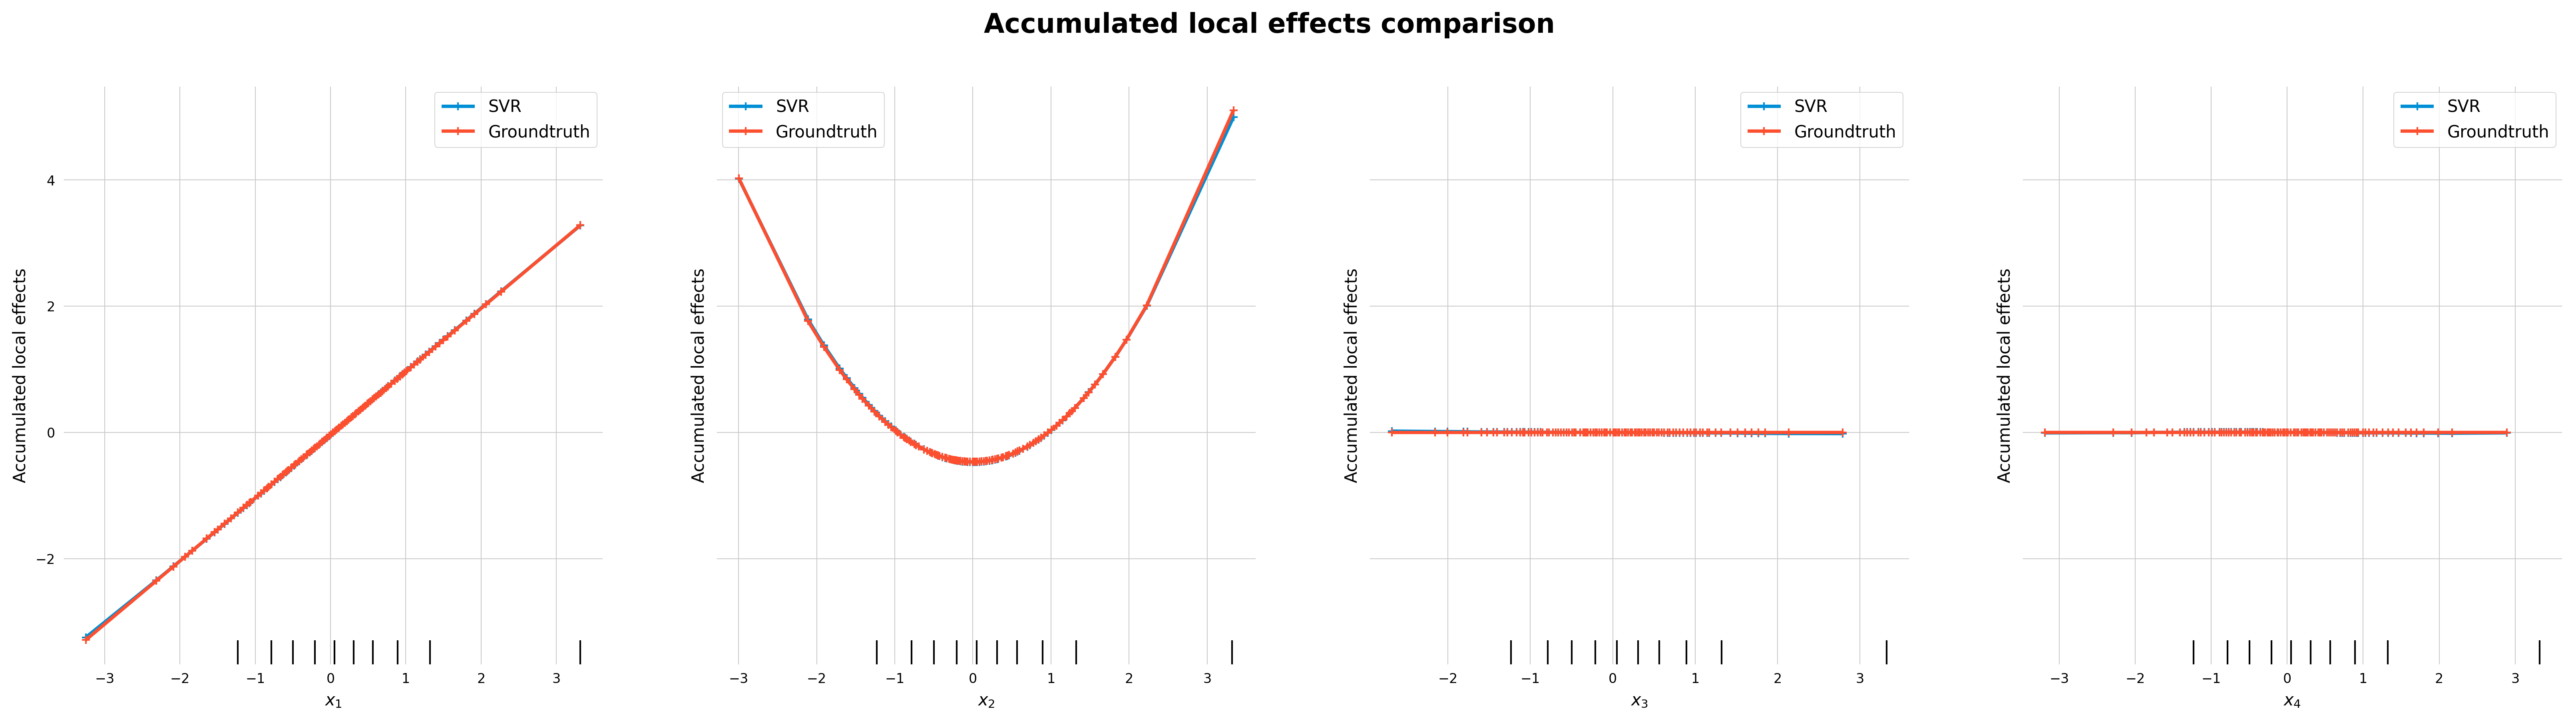

In [26]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);